In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


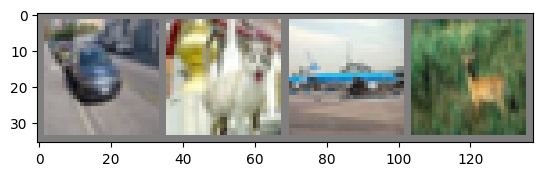

car   cat   plane deer 


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [4]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [12]:
class CustomLoss(nn.Module):
    def __init__(self):
        super(CustomLoss, self).__init__()

    def forward(self, inputs, targets):
        print(inputs.size(), targets.size())
        loss = -1 * (targets * torch.log(inputs) + (1 - targets) * torch.log(1 - inputs))
        return loss.mean()

In [13]:
import torch.optim as optim

criterion = CustomLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [14]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

torch.Size([4, 10]) torch.Size([4])


RuntimeError: The size of tensor a (4) must match the size of tensor b (10) at non-singleton dimension 1

In [7]:
outputs

tensor([[-1.7206, -1.7150,  1.2744,  0.7180,  2.2496, -0.0706,  2.8518,  0.2275,
         -3.0162, -1.1543],
        [-2.5917, -2.4899,  0.3775,  2.8424, -0.4026,  2.6776,  1.8277,  0.1394,
         -3.4805, -0.0259],
        [-0.4699,  0.0732,  0.1218, -0.0685,  0.6668, -0.2193,  0.0397,  0.9061,
         -1.3648, -0.1978],
        [ 4.2998,  0.4722,  0.3274, -1.5387,  0.3844, -2.8668, -2.0966, -2.6053,
          3.3792,  0.0690]], grad_fn=<AddmmBackward>)

In [8]:
labels

tensor([6, 5, 7, 8])

In [15]:
torch.rand(2,2)

tensor([[0.9738, 0.2282],
        [0.9802, 0.3780]])

In [16]:
torch.rand(2,2) + torch.rand(2,2)

tensor([[0.6176, 0.4215],
        [0.5078, 0.9950]])

In [20]:
a = torch.empty(2,3)
b = torch.empty(2,3)

In [23]:
a.sub_(b)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [25]:
print(a[:,1])

tensor([0., 0.])


In [26]:
a.view(6)

tensor([0., 0., 0., 0., 0., 0.])

In [27]:
a

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [28]:
x = torch.ones(5, requires_grad=True)

In [29]:
x

tensor([1., 1., 1., 1., 1.], requires_grad=True)

In [56]:
x = torch.randn(4, requires_grad=True)
a = torch.randn(4, requires_grad=True)
print(x)

tensor([ 1.7949,  0.4904,  0.4154, -2.0189], requires_grad=True)


In [93]:
y = (x+2+a).mean()
print(y)

tensor(2.4720, grad_fn=<MeanBackward0>)


In [96]:
v = torch.tensor([1,2,3,4])
#y.zero_grad()

y.backward(inputs=[x])

print(x.grad,a.grad)

tensor([0.7500, 0.7500, 0.7500, 0.7500]) tensor([0., 0., 0., 0.])


In [89]:
x.grad=torch.zeros(4)
a.grad = torch.zeros(4)

In [70]:
x.grad


tensor([0., 0., 0., 0.])

In [97]:
x.grad.zero_()

tensor([0., 0., 0., 0.])